In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [33]:
df = pd.read_csv("ev_sales.csv",encoding="unicode_escape")

In [34]:
df.shape

(982552, 7)

In [35]:
df.head(-10)

,Date,India's State Name,India's City Name,Vehicle Class,Vehicle Category,Vehicle Type,Maker Name
0,03-12-2024,MH,Mumbai,2,M-CYCLE/SCOOTER,Type-4,TVS
1,19-03-2024,UP,Lucknow,2,M-CYCLE/SCOOTER,Type-2,Hyundai
2,28-05-2024,DL,Delhi,2,M-CYCLE/SCOOTER,Type-4,Bajaj
3,23-03-2024,CH,Chandigarh,2,M-CYCLE/SCOOTER,Type-4,Bajaj
4,05-10-2024,KA,Bangalore,2,M-CYCLE/SCOOTER,Type-3,Kinetic
...,...,...,...,...,...,...,...
982537,11-05-2025,KA,Bangalore,2,M-CYCLE/SCOOTER,Type-2,Hyundai
982538,31-05-2025,TN,Chennai,2,M-CYCLE/SCOOTER,Type-1,TVS
982539,02-05-2025,WB,Kolkata,4,MOTOR CAR,Type-4,Mahindra
982540,19-05-2025,MP,Bhopal,2,M-CYCLE/SCOOTER,Type-5,TVS


# Data Cleansing

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982552 entries, 0 to 982551
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Date                982552 non-null  object
 1   India's State Name  982552 non-null  object
 2   India's City Name   982552 non-null  object
 3   Vehicle Class       982552 non-null  int64 
 4   Vehicle Category    982552 non-null  object
 5   Vehicle Type        982552 non-null  object
 6   Maker Name          982552 non-null  object
dtypes: int64(1), object(6)
memory usage: 52.5+ MB


In [37]:
# delete unrelated columns
df.drop(['Vehicle Type'],axis=1,inplace=True)

In [38]:
# rename columns
df.rename(columns={"India's State Name":"State","India's City Name":"City"},inplace=True)

In [39]:
# rename columns
df.rename(columns={"Date":"Date_str"},inplace=True)

In [40]:
print(df.dtypes)

Date_str            object
State               object
City                object
Vehicle Class        int64
Vehicle Category    object
Maker Name          object
dtype: object


In [41]:
# Convert datatype 
df['State'] = df['State'].astype("string")
df['City'] = df['City'].astype("string")
df['Vehicle Class'] = df['Vehicle Class'].astype("string")
df['Vehicle Category'] = df['Vehicle Category'].astype("string")
df['Maker Name'] = df['Maker Name'].astype("string")

In [42]:
df['Date_str'] = pd.to_datetime(df['Date_str'], dayfirst=True)

In [43]:
df['Month_Year'] = df['Date_str'].dt.strftime('%B %Y') # new column

In [44]:
# Get unique State list
df['State'].unique()

<StringArray>
['MH', 'UP', 'DL', 'CH', 'KA', 'TN', 'WB', 'RJ', 'MP', 'GJ']
Length: 10, dtype: string

In [45]:
# Convert abbreviated state names to their full forms.
df.replace({"State":{"MH":"Maharashtra","UP":"Uttar Pradesh","DL":"Delhi","CH":"Chandigarh","KA":"Karnataka","TN":"Tamil Nadu","WB":"West Bengal","RJ":"Rajasthan","MP":"Madhya Pradesh","GJ":"Gujarat"}},inplace=True)

In [46]:
# Get unique City list
df['City'].unique()

<StringArray>
[    'Mumbai',    'Lucknow',      'Delhi', 'Chandigarh',  'Bangalore',
    'Chennai',    'Kolkata',     'Jaipur',     'Bhopal',  'Ahmedabad']
Length: 10, dtype: string

In [47]:
# Get unique City list
df['Vehicle Class'].unique()

<StringArray>
['2', '3', '4']
Length: 3, dtype: string

In [48]:
# Map numeric values to vehicle type strings.
df.replace({'Vehicle Class':{"2":"2 Wheeler","3":"3 Wheeler","4":"4 Wheeler"}},inplace=True)

In [49]:
# Get unique Vehicle Category list
df["Vehicle Category"].unique()

<StringArray>
[                  'M-CYCLE/SCOOTER',     'M-CYCLE/SCOOTER-WITH SIDE CAR',
                             'MOPED', 'MOTOR CYCLE/SCOOTER-USED FOR HIRE',
       'MOTORISED CYCLE (CC > 25CC)',                     'E-RICKSHAW(P)',
          'E-RICKSHAW WITH CART (G)',             'THREE WHEELER (GOODS)',
         'THREE WHEELER (PASSENGER)',          'THREE WHEELER (PERSONAL)',
                         'MOTOR CAR',    'MOTOR CYCLE/SCOOTER-SIDECAR(T)']
Length: 12, dtype: string

In [50]:
# Standardize similar values into a single consistent value.
df.replace({"Vehicle Category":{"MOTOR CYCLE/SCOOTER-SIDECAR(T)":"M-CYCLE/SCOOTER-WITH SIDE CAR"}},inplace=True)

In [51]:
# Get unique Maker Name list
df['Maker Name'].unique()

<StringArray>
[          'TVS',       'Hyundai',         'Bajaj',       'Kinetic',
          'Hero',        'Maruti',      'Mahindra',         'Honda',
 'Ashok Leyland',          'Tata']
Length: 10, dtype: string

# Exploratory Data Analysis

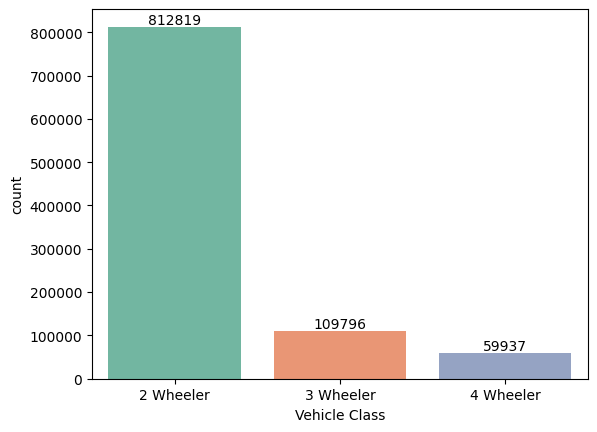

In [52]:
# count plot on variable - "Vehicle Class"

ax = sb.countplot(x = "Vehicle Class",data = df,hue="Vehicle Class", palette="Set2", legend=False)

# display label values in bar
for bar in ax.containers:
    ax.bar_label(bar)

plt.show()    

*The chart shows the status of electric vehicles by category.*

In [53]:
# Extract year into a new column
df['Year'] = df['Date_str'].dt.year

# Group by Year and Vehicle Class, and count occurrences
df_vehicle_yearwise = df.groupby(['Year', 'Vehicle Class']).size().reset_index(name='Total Sale')

print(df_vehicle_yearwise)

   Year Vehicle Class  Total Sale
0  2024     2 Wheeler      420555
1  2024     3 Wheeler       46040
2  2024     4 Wheeler       23064
3  2025     2 Wheeler      392264
4  2025     3 Wheeler       63756
5  2025     4 Wheeler       36873


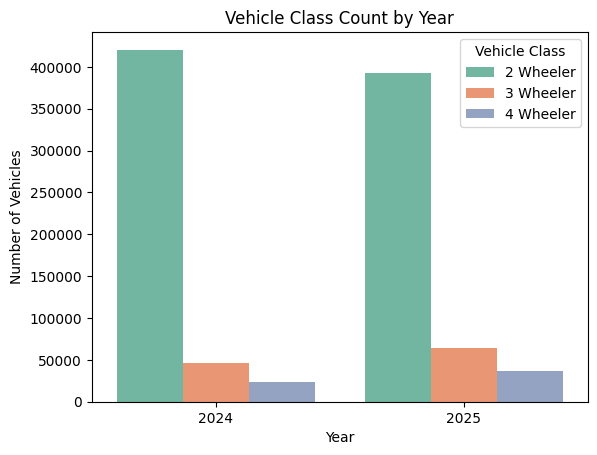

In [54]:
sb.barplot(x='Year', y='Total Sale', hue='Vehicle Class', data=df_vehicle_yearwise, palette='Set2')
plt.title('Vehicle Class Count by Year')
plt.ylabel('Number of Vehicles')
plt.show()

*The chart illustrates how electric vehicle adoption has progressed.*

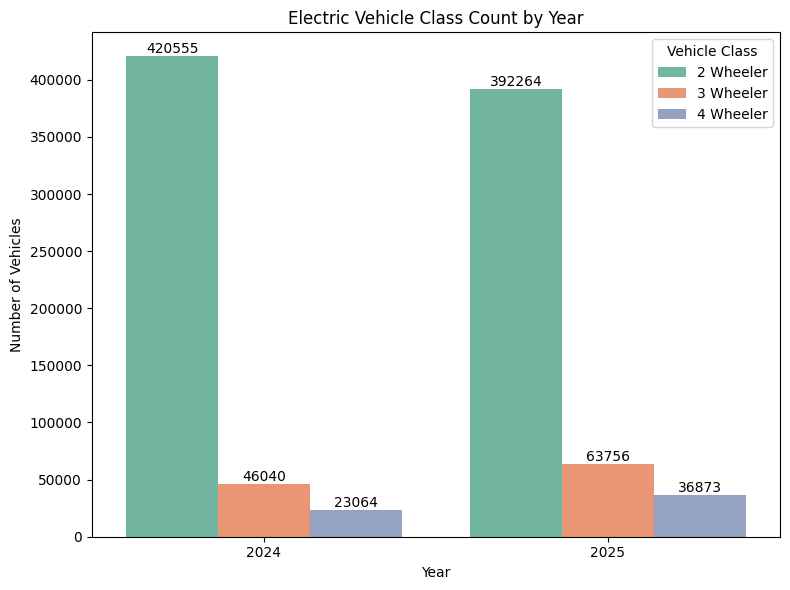

In [55]:
plt.figure(figsize=(8, 6))
ax = sb.barplot(x='Year', y='Total Sale', hue='Vehicle Class', data=df_vehicle_yearwise, palette='Set2')

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.3, int(height), ha="center", va="bottom")

# Titles and labels
plt.title('Electric Vehicle Class Count by Year')
plt.ylabel('Number of Vehicles')
plt.tight_layout()
plt.show()

*The chart illustrates how electric vehicle adoption has progressed.*

In [56]:
# Filter dataframe for 2025 , 2024 
df_2025 = df[df['Year'] == 2025]
df_2024 = df[df['Year'] == 2024]

In [57]:
# Classification based on State for Vehicle Sales
vehicle_counts_state_year_2025 = df_2025.groupby(['State', 'Year', 'Vehicle Class']).size().reset_index(name='Total Sale')
print(vehicle_counts_state_year_2025)

             State  Year Vehicle Class  Total Sale
0       Chandigarh  2025     2 Wheeler       38982
1       Chandigarh  2025     3 Wheeler        6431
2       Chandigarh  2025     4 Wheeler        3687
3            Delhi  2025     2 Wheeler       39343
4            Delhi  2025     3 Wheeler        6410
5            Delhi  2025     4 Wheeler        3615
6          Gujarat  2025     2 Wheeler       39245
7          Gujarat  2025     3 Wheeler        6414
8          Gujarat  2025     4 Wheeler        3825
9        Karnataka  2025     2 Wheeler       39430
10       Karnataka  2025     3 Wheeler        6472
11       Karnataka  2025     4 Wheeler        3557
12  Madhya Pradesh  2025     2 Wheeler       39115
13  Madhya Pradesh  2025     3 Wheeler        6280
14  Madhya Pradesh  2025     4 Wheeler        3721
15     Maharashtra  2025     2 Wheeler       39520
16     Maharashtra  2025     3 Wheeler        6357
17     Maharashtra  2025     4 Wheeler        3655
18       Rajasthan  2025     2 

In [58]:
vehicle_counts_state_year_2024 = df_2024.groupby(['State', 'Year', 'Vehicle Class']).size().reset_index(name='Total Sale')
print(vehicle_counts_state_year_2024)

             State  Year Vehicle Class  Total Sale
0       Chandigarh  2024     2 Wheeler       41956
1       Chandigarh  2024     3 Wheeler        4588
2       Chandigarh  2024     4 Wheeler        2324
3            Delhi  2024     2 Wheeler       42023
4            Delhi  2024     3 Wheeler        4695
5            Delhi  2024     4 Wheeler        2340
6          Gujarat  2024     2 Wheeler       41986
7          Gujarat  2024     3 Wheeler        4551
8          Gujarat  2024     4 Wheeler        2230
9        Karnataka  2024     2 Wheeler       42071
10       Karnataka  2024     3 Wheeler        4596
11       Karnataka  2024     4 Wheeler        2319
12  Madhya Pradesh  2024     2 Wheeler       41846
13  Madhya Pradesh  2024     3 Wheeler        4567
14  Madhya Pradesh  2024     4 Wheeler        2303
15     Maharashtra  2024     2 Wheeler       42182
16     Maharashtra  2024     3 Wheeler        4523
17     Maharashtra  2024     4 Wheeler        2280
18       Rajasthan  2024     2 

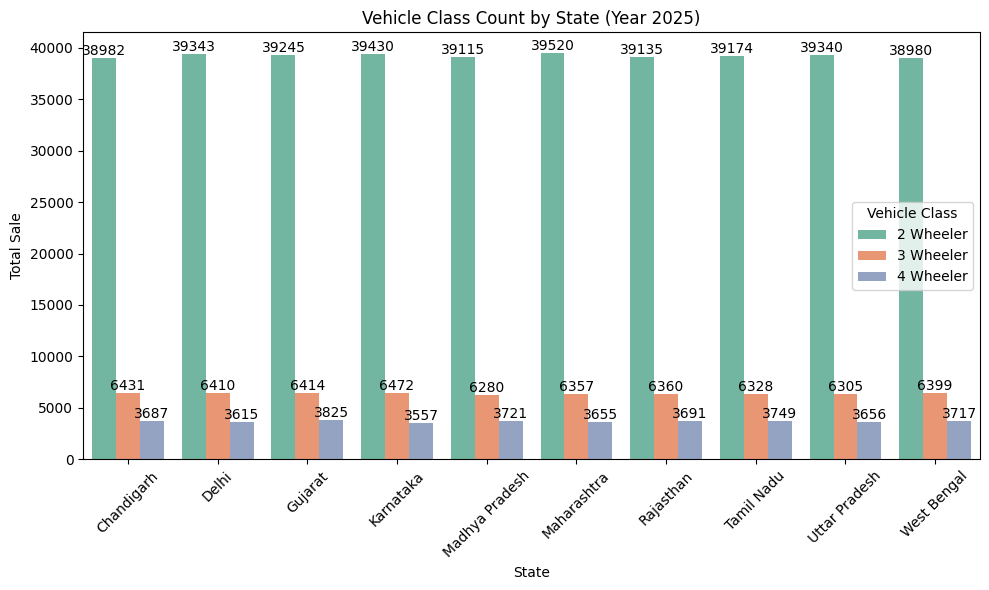

In [59]:
# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
ax = sb.barplot(data=vehicle_counts_state_year_2025, x='State', y='Total Sale', hue='Vehicle Class', palette='Set2')

# Add count labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha='center', va='bottom')

# Final chart formatting
plt.title('Vehicle Class Count by State (Year 2025)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*State-wise electric vehicle usage in 2025 is depicted in the chart.*

In [60]:
# based on City in 2025
# Find top 5 cities by count in 2025
top_cities = (
    df_2025['City']
    .value_counts()
    .head(5)
    .sort_values(ascending=False)
    .index
)

# Filter data for top 5 cities in 2025
df_top5_cities_2025 = df_2025[df_2025['City'].isin(top_cities)]

# Group by City and Vehicle Class in year 2025
vehicle_counts_city_top5_2025 = (
    df_top5_cities_2025
    .groupby(['City', 'Vehicle Class'])
    .size()
    .reset_index(name='Count')
)

print(vehicle_counts_city_top5_2025)

         City Vehicle Class  Count
0   Ahmedabad     2 Wheeler  39245
1   Ahmedabad     3 Wheeler   6414
2   Ahmedabad     4 Wheeler   3825
3   Bangalore     2 Wheeler  39430
4   Bangalore     3 Wheeler   6472
5   Bangalore     4 Wheeler   3557
6       Delhi     2 Wheeler  39343
7       Delhi     3 Wheeler   6410
8       Delhi     4 Wheeler   3615
9     Lucknow     2 Wheeler  39340
10    Lucknow     3 Wheeler   6305
11    Lucknow     4 Wheeler   3656
12     Mumbai     2 Wheeler  39520
13     Mumbai     3 Wheeler   6357
14     Mumbai     4 Wheeler   3655


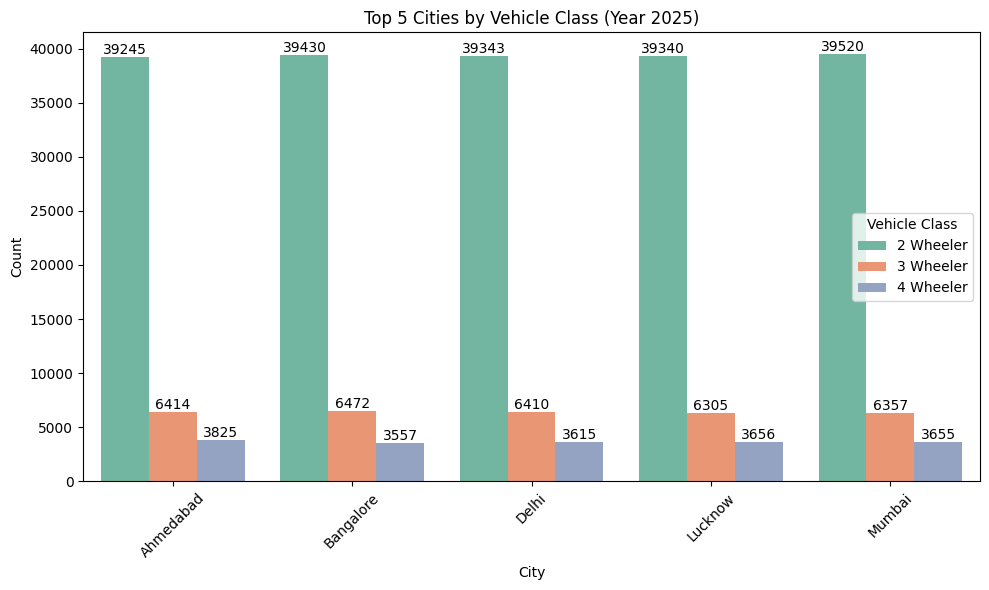

In [71]:
# Plot the grouped bar chart on top 5 cities in 2025
plt.figure(figsize=(10, 6))
ax = sb.barplot(data=vehicle_counts_city_top5_2025, x='City', y='Count', hue='Vehicle Class', palette='Set2')

# Add count labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha='center', va='bottom')

# Final touches
plt.title('Top 5 Cities by Vehicle Class (Year 2025)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Leading 5 cities in electric vehicle adoption in Year 2025.*

### Month wise status in Year 2025

In [63]:
# Extract month

df_2025 = df[df['Year'] == 2025]
df['Month'] = df['Date_str'].dt.month_name()


# Group by Month and count entries
'''
monthly_counts_2025 = (
    df_2025['Month']
    .value_counts()
    .reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    .fillna(0)
    .reset_index()
)

monthly_counts_2025.columns = ['Month', 'Count']
'''

# Group by Month and Vehicle Class
monthly_class_counts = (
    df_2025
    .groupby(['Month', 'Vehicle Class'])
    .size()
    .reset_index(name='Count')
)

# Reorder months for correct display
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_class_counts['Month'] = pd.Categorical(monthly_class_counts['Month'], categories=month_order, ordered=True)
monthly_class_counts = monthly_class_counts.sort_values('Month')

print(monthly_class_counts )

       Month Vehicle Class  Count
6    January     2 Wheeler  83577
7    January     3 Wheeler  13747
8    January     4 Wheeler   7849
3   February     2 Wheeler  67642
4   February     3 Wheeler  10934
5   February     4 Wheeler   6387
9      March     2 Wheeler  97599
10     March     3 Wheeler  15807
11     March     4 Wheeler   9247
0      April     2 Wheeler  82490
1      April     3 Wheeler  13367
2      April     4 Wheeler   7645
12       May     2 Wheeler  60956
13       May     3 Wheeler   9901
14       May     4 Wheeler   5745


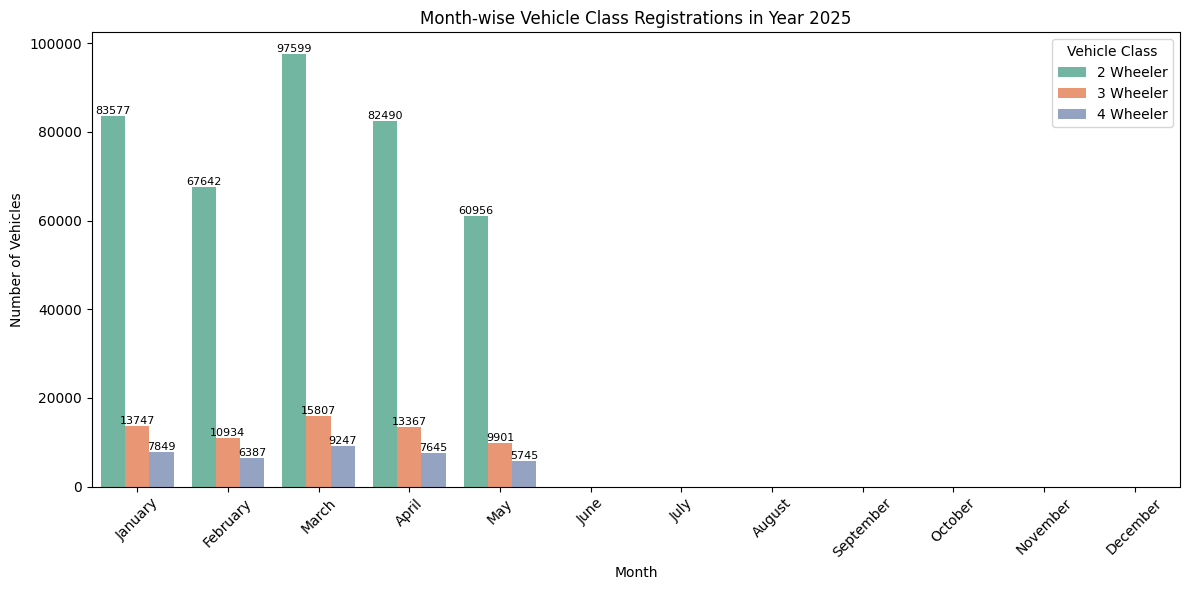

In [65]:
# Plot
plt.figure(figsize=(12, 6))
sb.barplot(data=monthly_class_counts, x='Month', y='Count', hue='Vehicle Class', palette='Set2')

# Add value labels
for bar in plt.gca().patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.3,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=8
        )

# Final touches
plt.title('Month-wise Vehicle Class Registrations in Year 2025')
plt.xlabel('Month')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Class')
plt.tight_layout()
plt.show()

*The above bar chart illustrates the monthly growth of electric vehicle registrations in 2025.*

### Distribution of vehicle registrations by maker in the overall market

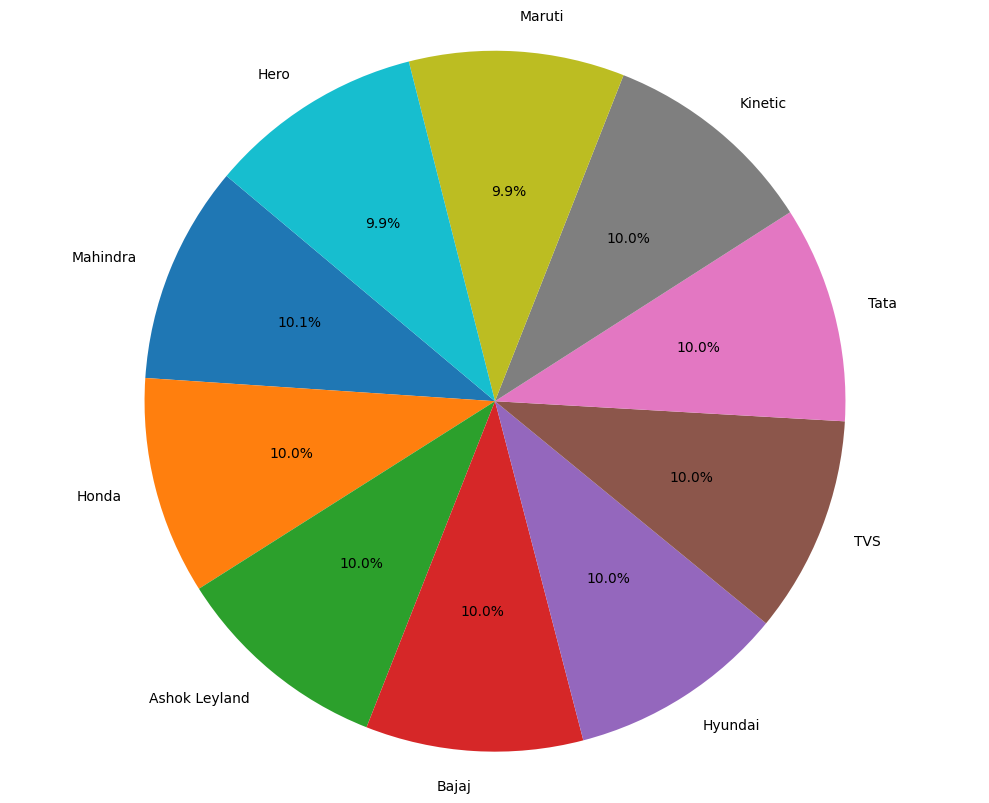

In [67]:
# Group by Maker Name
maker_counts = df_2025['Maker Name'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(maker_counts, labels=maker_counts.index, autopct='%1.1f%%', startangle=140)
#plt.title("Vehicle Distribution by Maker Name (2025)")
plt.axis('equal')
plt.tight_layout()
plt.show()

*This above chart displays the market share of each vehicle manufacturer based on registration data.*

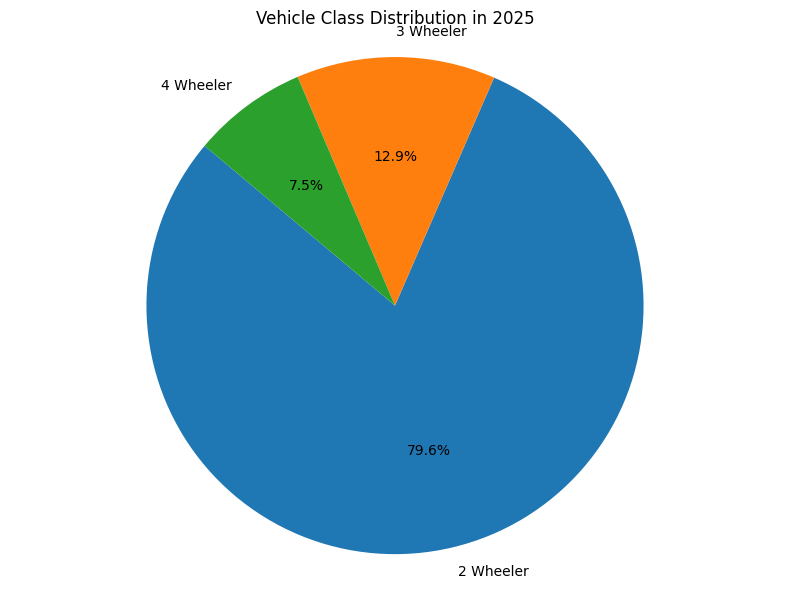

In [70]:
# Count vehicles by class
vehicle_class_counts = df_2025['Vehicle Class'].value_counts().sort_index()

# Optional: Map class numbers to readable names
class_labels = {
    2: 'Two-Wheeler',
    3: 'Three-Wheeler',
    4: 'Four-Wheeler',
}
labels = [class_labels.get(vc, str(vc)) for vc in vehicle_class_counts.index]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(vehicle_class_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Class Distribution in 2025')
plt.axis('equal')  # Equal aspect ratio
plt.tight_layout()
plt.show()

*This pie chart shows which vehicle category has the highest sales in the overall market.*